# INFO 2950: Phase 4

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Part 1: Introduction

### Research Question: 

Of the factors like GDP, average income, number of private and public universities, etc. that can impact the percentage of the population with tertiary education in a country per year, which factors have more impact on the percentage of the population with tertiary education in OECD countries?


### Background Information:

In this project, we will observe the percentage of people in OECD countries who obtained a tertiary degree. Factors like the country's GDP per capita, average family income, average spending on higher education, the population of the country, how much the country spends on education, the total number of universities, and primary, secondary, and tertiary enrollment rates are all included as variables in this model. We will train a multivariate regression to see if we can reliably predict the percentage of the population with tertiary education. We will also look to see which combinations of factors minimize the residual and thus have a greater impact/correlation on the percentage of the population with tertiary education among the age groups of 25-34. 

OECD stands for Organization for Economic Cooperation and Development and is a group of countries with market-based economies that collaborate to promote sustainable economic growth. We chose countries that are part of the OECD to evaluate because they account for three-fifths of the world's GDP, have similar economic infrastructure, and the data available on OECD countries are more extensive than countries that don’t participate in the OECD. Because of these similarities in its economic infrastructure, we decided that this group of countries would be easier to evaluate compared to attaining data from all 197 countries in the world.

### Summary of Findings:

## Part 2: Data Descriptions/Cleaning

### Note: all these description is just a summary of our data collection, cleaning, and descriptions, the full details can be found: 

### Data Collection:
With our research question in mind, we looked for data sets that fit our analysis. Most of our data sets were collected from the official OECD library (https://www.oecd-ilibrary.org/), which collects and stores data for all OECD countries and The World Bank (https://www.worldbank.org/en/home), which provides economic data for all countries around the world. 

### Data Cleaning:
- Since we wanted to only analyze OECD countries, we cleaned our data sets to make sure they only included data from these 38 countries. To do this, we created a list of OECD countries and only selected those countries in the data set. Furthermore, from the data sets we collected from the OECD library, there were a lot of attributes that were not necessary to our analysis. Because of this, we removed these columns from the raw data set. In addition, some of the data was not collected before a certain year or was not published yet for the more recent years. Because of this, to reduce the amount of missing data, we needed to restrict the data to the years 1995 to 2020. 
- We also renamed all the columns in our data sets to be more clearer and concise. 
- Another thing we noticed was that different data sets had different observations for the Country columns. Some data sets listed the country’s full name, while others listed the country’s code. Because of this, for the data sets that included the country’s full name, we mapped it to their corresponding country codes in order to be consistent with all the data sets.
- With all this cleaning, we were able to create our final data set. We used a left join in order to merge all the data sets into one final data set. 



#### What are the observations (rows) and the attributes (columns)?
In our final data set, each observation represents a specific country (from the list of OECD countries) for the years 1995-2020. Each observation also has associated measures that relate to the country’s economic, educational, and demographic aspects for the corresponding year. 

The attributes for our final data set are: 
- “Country” (an OECD country)
- “Year” (ranges from 1995 to 2020)
- “GDP per Capita” (the sum of the gross domestic product divided by the population of the country in that certain year)
- “Population” (the total population of that country in millions of people)
- “Average Spending on Higher Education” (the average amount of money a student spends on higher education in dollars)
- “Government Expenditure On Education (%)” (the percentage of government spending on education as a percentage of the GDP)
- “Government Spending Teritary (% Gov Spending)” (the percentage of government spending on tertiary education as a percentage of overall government spending)
- “Household Income per Capita” (the average income earned by each individual in a household divided by the population of the country)
- “Number of Universities” (the total number of universities, public and private, in each country)
- “Primary Enrollment rate” (the percentage of people enrolled in primary education divided by the total population in that age group)
- “Secondary Enrollment rate” (the percentage of people enrolled in secondary education divided by the total population in that age group)
- “Tertiary Enrollment rate” (the percentage of people enrolled in tertiary education divided by the total population in that age group)
- “Population with Tertiary Education” (the percentage of total population in the age group 25-34 who have completed tertiary education)


#### Why was this dataset created? Who funded the creation of the dataset?

Our final data set was created from 4 different sources: The OECD library ( https://www.oecd-ilibrary.org/), The World Bank (https://www.worldbank.org/en/home), Webometrics (https://www.webometrics.info/en/distribution_by_country), and Our World in Data (https://ourworldindata.org/global-education). 

All the data sets from the OECD library (gdp_df, population_df, average_spending_df, household_income_df, completed_tertiary_edu_df) were created in part of larger datasets in order to provide reliable information about the OECD countries statistics for internal OECD users (in particular, the Economics Department), member country government agencies, and other external users in academic institutions and private enterprises. These datasets were compiled and curated by the OECD based on information collected from member countries. The data is typically gathered through surveys, censuses, and other statistical methods. Member countries report their economic data to the OECD, following standardized reporting formats and guidelines.  Because the OECD is an international organization funded by its member countries, the member countries probably funded this data collection process. 

The data sets from World Bank (government_expenditure_df, gdpPerTertEdu_df) were created to monitor and provide information on global trends to member countries and corresponding policymakers to help make informed decisions. The data set was created using information from the UNESCO Institute for Statistics and the ISCED. 

The data set num_universities_df was created using information from the Webometrics Ranking of World Universities, run and funded by a research group belonging to the Consejo Superior de Investigaciones Científicas (CSIC), the largest public research body in Spain. They created this dataset because they wanted to create a representative sample of all the universities in all countries and their rankings in the country for useful economic-related analysis. 

The data set enrollment_rates_df, was created by Our World in Data, which is a project of the Global Change Data Lab, which is a registered charity in England and Wales. It was created to show how school enrollment around the world increased dramatically in the last century. Because this research lab is associated with the University of Oxford, the data set was probably funded by it. 


#### What processes might have influenced what data was observed and recorded and what was not?

The OECD data sets rely on the member countries to voluntarily report data based on standardized methodologies and guidelines. Because of this, there could be variations in reporting practices among the member countries which can influence what data was observed and recorded and the consistency of it.

Furthermore, for most of the other data sets, the methods used to collect data were surveys and census. For both of these, the design of the questions asked and the wording can influence a respondent’s answers; different survey/census question designs may lead to variations in responses. Furthermore, because censuses aim to collect from the entire population, variations can arise if certain groups don’t fill out the census and are undercounted. There could also be challenges in reaching all the individuals in the country to fill out the census, which may impact the data observed and recorded and what was not.

#### What preprocessing was done, and how did the data come to be in the form that you are using?


#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Because all the data was collected through voluntary methods of census and surveys, the people involved were aware of the data collection. They probably expected the data to be used to collect statistics about the population of that country. 


## Part 3: Preregistration Statements

### Preregistration 1: How does GDP have an impact on the completed tertiary education rates among the age groups 25-34?

- $H_0$: GDP has a greater impact on completed tertiary education rates among the age group 25-34 compared to other factors in our model.
- $H_A$: GDP has no impact on completed tertiary education rates among the age group 25-34 compared to the other factors in our model.

### Preregistration 2: How does government spending on education impact the completed tertiary education rates among the age groups 25-34?

- $H_0$: The rate of completed higher education stays the same with higher government spending on education.
- $H_A$: The rate of completed higher education increases with higher government spending on education.


For both these models, we will accept a p-value (indicating the probability of our observed data given that our null hypothesis is true) that is less than 0.05 from our linear regression.


## Part 4: Data Analysis

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [30]:
combined_df = pd.read_csv("combined_data.csv")

### Exploratory Analysis

### How does the GDP per Capita of OECD countries change over time?

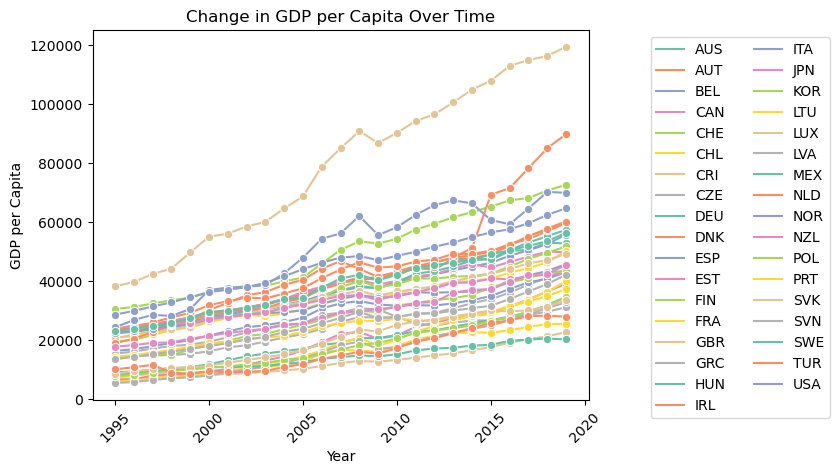

In [31]:
sns.lineplot(data = combined_df, x = "Year", y = "GDP per Capita", 
            hue = "Country", 
            marker = "o", palette = "Set2");
plt.legend(bbox_to_anchor = (1.5,1), loc = 'upper right', ncol = 2);
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita Over Time");

Although the graph is colored based on the country it represents, the large amount of countries makes it difficult to decipher which line is for which country.

In the graph, a line that stood out to us was the orange country that always had the highest GDP per capital. Therefore, we want to isolate the country this line represents.

In [32]:
gdp_col = combined_df["GDP per Capita"]
max_gdp = gdp_col.max()
count_max_gdp = combined_df.loc[gdp_col == max_gdp]["Country"]
print ("The country with highest gdp per capita is",
       count_max_gdp.to_string(index = False))

The country with highest gdp per capita is LUX


According to the WorldBank, GDP per captia is a measure of economic growth in that it measures the average value of output per person, which can indirectly provide information about the poverty situation and general income of the country. The formula for GDP per capita is the real GDP divided by Population – where the real GDP is an inflation-adjusted measure of the value of all goods and services produced in an economy. Knowing this can impact the number of completed tertiary education because the completion of this may depend on whether families or individuals can afford to remain enrolled in these programs.

Using this graph, we can see a general linear increase in GDP per Capita. In addition, we can also observe that Luxembourg has the highest GDP per capita for all 25 years of our analysis. This is quite interesting given that Luxembourg is a small country that is mostly rural land with slighly over 640,000 people. 

However, since there are so many countries, it can be difficult to uncover any specific details.  

To help us better divide and analyze the data, we are going to create a new column that indicates the continent that the country is from. Using https://en.wikipedia.org/wiki/OECD, we grouped them based on geographic location. Since most countries are from Europe, we merged the Americas together and the Asia and Oceania countries together.

In [33]:
cont_map = {"AUS" : "OceaAsia","AUT":"Europe","BEL":"Europe",
            "CAN":"Americas", "CHL":"Americas", "COL":"Americas",
            "CRI":"Americas","CZE":"Europe", 
            "DNK":"Europe", "EST": "Europe", 
            "FIN":"Europe", "FRA":"Europe", "DEU":"Europe", 
            "GRC":"Europe", "HUN":"Europe", "ISL":"Europe", 
            "IRL":"Europe","ISR":"OceaAsia", "ITA":"Europe", 
            "JPN":"OceaAsia", "KOR":"OceaAsia", 
            "LVA":"Europe", "LTU":"Europe", "LUX":"Europe", 
            "MEX":"Americas", "NLD":"Europe", "NZL":"OceaAsia",
            "NOR":"Europe", "POL":"Europe", "PRT":"Europe", 
            "SVK":"Europe","SVN":"Europe","ESP":"Europe",
            "SWE":"Europe","CHE":"Europe", "TUR":"OceaAsia",
            "GBR":"Europe","USA":"Americas"}

combined_df["Geographic Location"] = combined_df["Country"].map(cont_map)

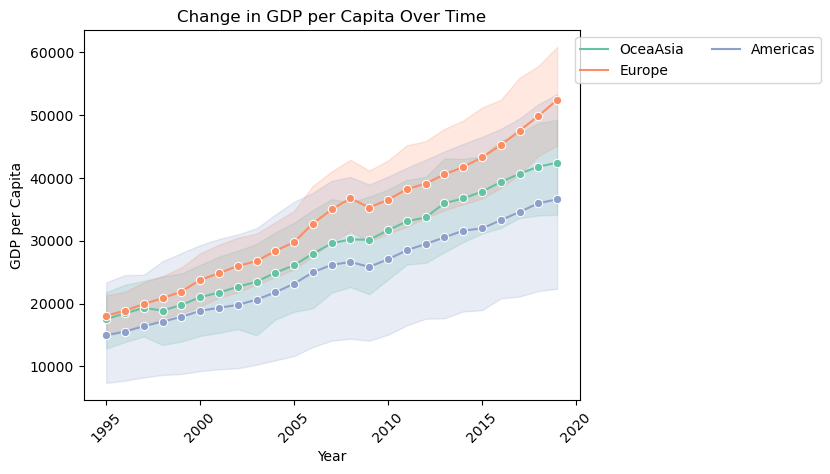

In [34]:
sns.lineplot(data = combined_df, x = "Year", y = "GDP per Capita", 
            hue = "Geographic Location", 
            marker = "o", palette = "Set2");
plt.legend(bbox_to_anchor = (1.5,1), loc = 'upper right', ncol = 2);
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita Over Time");

Again, as the years pass by, we spot a general increase in GDP per captia.

With the  increasing trend, we would expect there to be a general increase in the percentage of people who completed tertiary education, assuming all else is equal. Specifically, the countries in Europe seem to have a strong economy. However, this method of aggregating based on geographic location can lead to bias. Given that most of the OECD countries are European countries – 26 of the total 38 countries are in fact European countries– the other regions are will have less countries in their own categories. This will make regions with less countries like Oceania and Asia and the Americas be more vulnerable to extremely large and small GDP per capita values. For instance, the GDP per capita for the USA in 2019 is approximately 6 times the GDP per capita for Colombia in 2019. In the graph, we can see this. Even though the GDP for the USA is extremely high, the average GDP per capita line for the Americas in 2019 is near 25000, which indicates that there a lot of countries in the Americas that have low GDP per capita values, like Colombia, that bring the average GDP per capita down. 


In [35]:
chile_query = """
              SELECT Country, Year, "GDP per Capita"
              FROM combined_df
              WHERE (Country = 'CHL')
              AND (Year = 2019)
              """

chile_19 = duckdb.sql(chile_query).df()
chile_19_gdp = chile_19['GDP per Capita'].to_string(index=False)

usa_query = """
              SELECT Country, Year, "GDP per Capita"
              FROM combined_df
              WHERE (Country = 'USA') AND (Year = 2019)
              """

usa_19 = duckdb.sql(usa_query).df()
USA_19_gdp = usa_19["GDP per Capita"].to_string(index = False)

print ("The GDP per capita for Chile in 2019 is", chile_19_gdp)
print ("The GDP per capita for USA in 2019 is", USA_19_gdp)

min_query = """
            SELECT Country, Year, "GDP per Capita",
            "Geographic Location"
            FROM combined_df
            WHERE ("Geographic Location" = 'Americas') AND (Year = 2019)
            
            """

amer_gdp19 = duckdb.sql(min_query).df()
min_gdp = amer_gdp19["GDP per Capita"].min()
count_min_gdp = combined_df.loc[gdp_col == min_gdp]["Country"]
print ("The country with lowest gdp per capita is",
       count_min_gdp.to_string(index = False))

col_query = """
              SELECT Country, Year, "GDP per Capita"
              FROM combined_df
              WHERE (Country = 'COL') AND (Year = 2019)
              """

col_19 = duckdb.sql(col_query).df()
COL_19_gdp = col_19["GDP per Capita"].to_string(index = False)
print ("The GDP per capita for COL (Columbia) in 2019 is", COL_19_gdp)

The GDP per capita for Chile in 2019 is 25509.45
The GDP per capita for USA in 2019 is 64690.27
The country with lowest gdp per capita is MEX
The GDP per capita for COL (Columbia) in 2019 is Series([], )


### How does GDP per Capita impact the percentage of population with tertiary education?

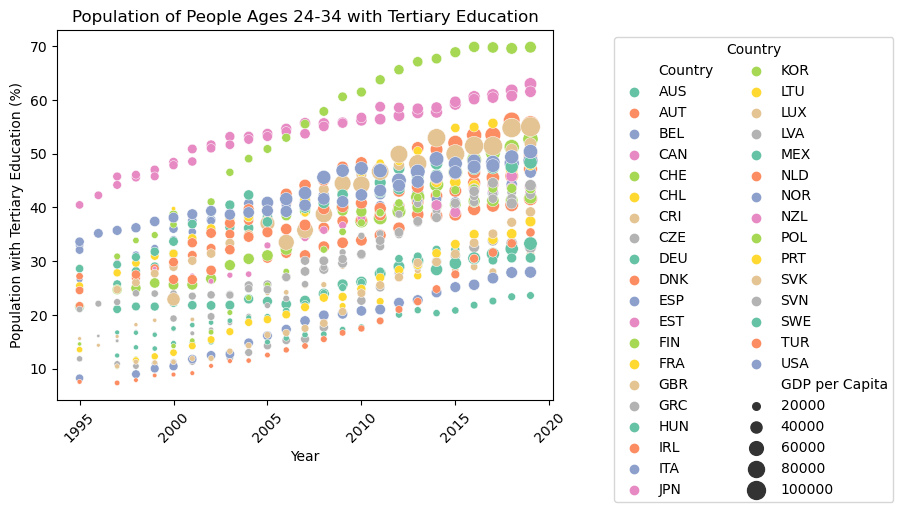

In [36]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', 
           ncol = 2, title = "Country");
plt.xticks(rotation = 45);
plt.title ("Population of People Ages 24-34 with Tertiary Education");

This graph shows the relationship between time, percent of population of ages 24-34 with a tertiary education, GDP per capita, and the country.

As mentioned in the previous observation about the relationship between GDP per capita and year, for most, if not all, the countries show a positive change in GDP per capita over time. This graph also shows this relationship, with the increase in time, there is a gradual increase in dot size, which is based on the GDP per capita. 

In addition, bigger dots, which means larger GDP per captia, is correlated to a higher level of teritary education. Generally, the majority of the dots that has above a 30% population with tertiary education has a larger dot compared to those below the 30% line. In the 1990s when the dots are all small, the range of population with teritary among all the countries is between 5% to 40%. However, in 2020, the dots grew bigger in size adn the  range of population with teritary among all the countries is between 20% to 70%. 

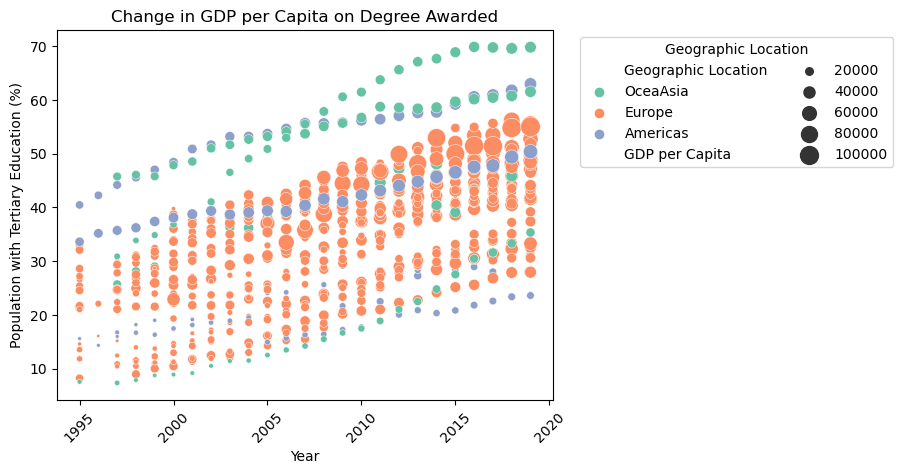

In [37]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Geographic Location", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));

plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita on Degree Awarded");

This graph groups the data points based on geographic location because we wanted to see if geographic location plays a role in tertiary population. Looking at this graph, we can see there is a large portion in the middle of data point from European countries. But the other geographic locations are quite scattered and have less data points. This is because the OECD is mainly composed of countries who describe themselves as committed to democracy and the market economy. This graph is significant in showing the limitation of this dataset in that not only does it have thorough data for all the years but the observations made can not be extended to all countries with a high accuracy.

In [38]:
y_col = combined_df["Population with Tertiary Education (%)"]
max_y = y_col.max()

count_max_y = combined_df.loc[y_col == max_y]["Country"]
print ("The country with highest population with tertiary education is",
       count_max_y.to_string(index = False))
print("The percent of population with", 
       "Tertiary Education for South Korea in 2019 is",
       max_y)

kor_query2 = """
              SELECT Country, Year, "GDP per Capita"
              FROM combined_df
              WHERE (Country = 'KOR')
              AND (Year = 2019)
              """

kor_19 = duckdb.sql(kor_query2).df()
kor_19_gdp = kor_19['GDP per Capita'].to_string(index=False)
print ("The GDP per capita for S.Korea in 2019 is", kor_19_gdp)

lux_query = """
              SELECT Country, Year, 
              "Population with Tertiary Education (%)"
              FROM combined_df
              WHERE (Country = 'LUX')
              AND (Year = 2019)
              """

lux_19 = duckdb.sql(lux_query).df()
lux_19_gdp = lux_19['Population with Tertiary Education (%)'].to_string(index=False)
print ("The percent of population with", 
       "Tertiary Education for Luxembourg in 2019 is",
       lux_19_gdp)

The country with highest population with tertiary education is KOR
The percent of population with Tertiary Education for South Korea in 2019 is 69.851555
The GDP per capita for S.Korea in 2019 is 43410.15
The percent of population with Tertiary Education for Luxembourg in 2019 is 54.989532


But this graph also shows evidence that GDP perhaps is not the largest factor in population with teritary, given that countries like South Korea with a relative small GDP per Capita of only 43410.15 has such a high population of people with tertiary education (69.85%). In our analysis of the GDP per captia for countries, we pointed out that Luxembourg has the all-time highest GDP per captia. However, the percentage of population with tertiary education is significantly less than the percentage for South Korea.

### Does the number of universities impact the population of people with tertiary education?

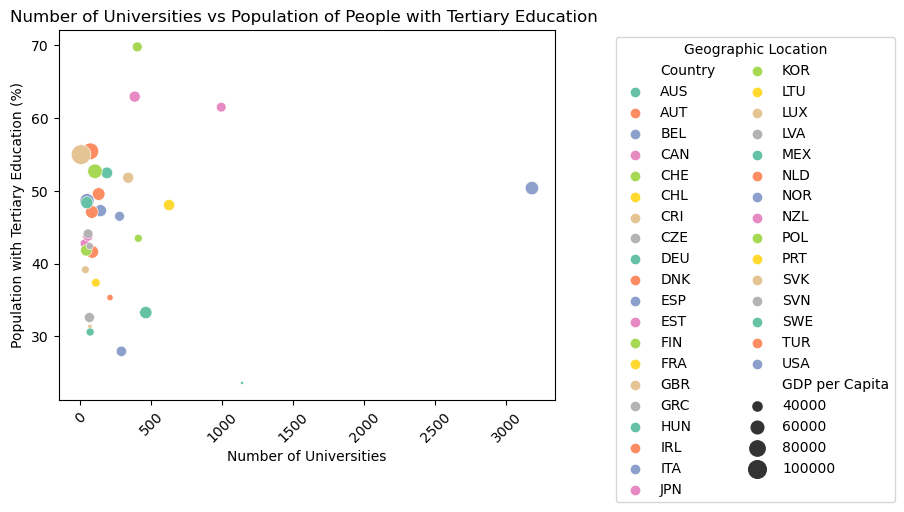

In [39]:
pop_tert_edu19 = combined_df.loc[combined_df["Year"] == 2019]
sns.scatterplot(data = pop_tert_edu19, x = "Number of Universities", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Number of Universities vs Population of People with Tertiary Education ");

This graph shows the relationship between the country's total number of univerities and the percentage of the population with tertiary education. The graph shows that most countries have fewer than 500 universities, with USA being a notable outlier (over 3000 universities). 

We expected that as the number of universities increase, there would be a higher percentage of people with tertiary education. However, based on our graph, there doesn't seem to be a large correlation between the number of universities and the population of people with tertiary education. For instance, there are Japan and Mexico both has approximately 1000 universities, but their tertiary education data is very different– Japan has a tertiary education level of approximately 61.51% and Mexico has a tertiary education level of approximately 23.59%.

In [40]:
query = """
        SELECT Country, Year, "Number of Universities", 
        "Population with Tertiary Education (%)"
        FROM combined_df
        WHERE (("Number of Universities" >= 900)
        AND ("Number of Universities" <= 1500))
        AND Year = 2019;
        """

comp_1000uni = duckdb.sql(query).df()
print (comp_1000uni)

  Country  Year  Number of Universities  \
0     JPN  2019                     992   
1     MEX  2019                    1139   

   Population with Tertiary Education (%)  
0                               61.514194  
1                               23.587111  


### What is the relationship between enrollment rates by grade and percentage of population with tertiary education? Are enrollment rates by grade indicative of percentage of population with tertiary education?

For these graphs that show the relationship between enrollment and population of people with tertiary education, there domain or the enrollment rates decreased as the level of education increased. We also noticed the trend that the graph for the primary enrollment rate, there is not a very clear relationship between the enrollment rate and the percentage of total population, whereas the other two graphs show an increasing trend between enrollment rates and percentage of total population with tertiary education. This may be due to the fact that in between the time of primary school and tertiary school, there may be other factors that minizes the impact of primary enrollment on the final percentage of total population with tertiary education.

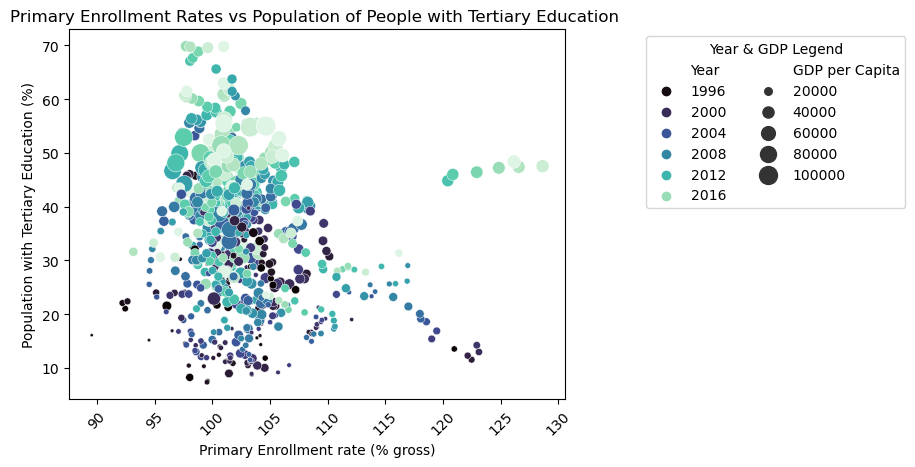

In [41]:
sns.scatterplot(data = combined_df, x = "Primary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Primary Enrollment Rates vs Population of People with Tertiary Education ");

This graph shows the relationship between rates of enrollment in primary education and the percentage of the population with tertiary education.

The graph above shows that from 1995 to 2005, enrollment rates in primary education has generally stayed the same. We would expect this, since primary education is typically mandated by law in many countries. However, the plots for more recent years, indicated by the lighter colors, correspond to higher percentages of the population with tertiary education. This suggests that the general increase in the percentage of population with tertiary education across OECD countries is not dependent on primary enrollment rates.

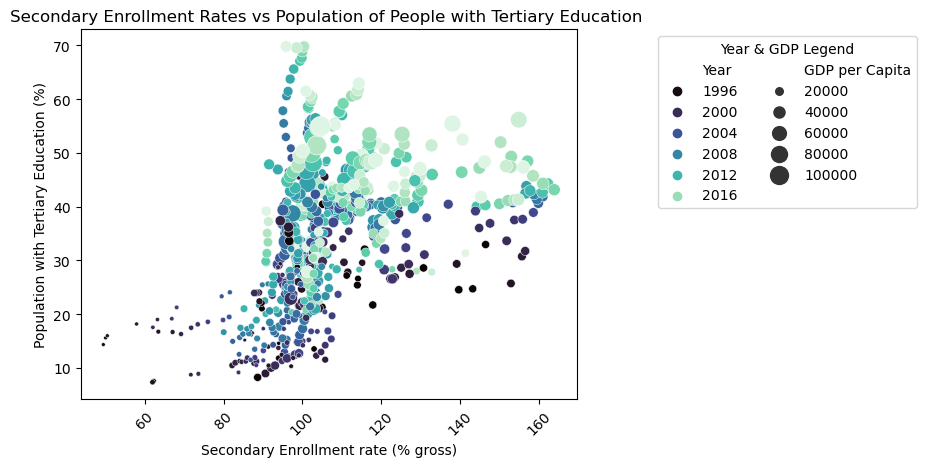

In [42]:
sns.scatterplot(data = combined_df, x = "Secondary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Secondary Enrollment Rates vs Population of People with Tertiary Education ");

This graph above shows the relationship between rates of enrollment in secondary education and the percentage of the population with tertiary education. There is a positive but weak correlation between the two variables. We would expect there to be more of a positive correlation compared to the previous graph, as secondary education often serves as a critical pathway to tertiary education.

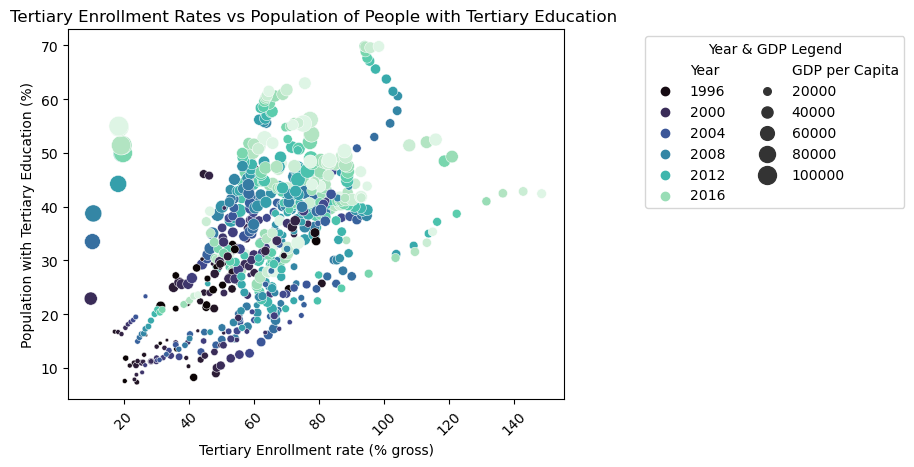

In [43]:
sns.scatterplot(data = combined_df, x = "Tertiary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Year & GDP Legend");
plt.xticks(rotation = 45);
plt.title ("Tertiary Enrollment Rates vs Population of People with Tertiary Education ");

This graph above shows the relationship between rates of enrollment in tertiary education and the percepntage of the population with tertiary education. There is a positive correlation, which intuitively makes sense as as individuals enrolling in tertiary education contribute to the percentage of the population with tertiary education.

Of the three grade levels, this graph shows the greatest amount of correlation between enrollment rates and tertiary education rates. This makes sence because many countries requires its residents to complete a certain amount of year of education, but the completion of a higher education is not required. 

There is a subset of data points that has low enrollment rates but relatively high percentage of total population with tertiary education. This is interesting because for countries with lower enrollment rates, we expected there to be a lower population with tertiary education– even if the percentage of total population with tertiary education is not for the immediate graduating population but for ages 24 - 34. To add on, the GDP for this subset of abnormal data shown in the last graph has a relatively large GDP per Capita, which signals that countries in this subset is economically strong and people have high purchasing power. This lead us to be slightly concerned about the coherence of our dataset. Although websites we used to obtain our datasets are world data databases, it can be possible that the methodology is slightly different leading to somewhat contradicting data points.

This graph also shows another subset of data points that has high enrollment rates of over 120% but percentage of total population with tertiary education of below 50%. This is not as surprising given that students have the ability to not finish their degree program. But it provides insight to our research in that although higher tertiary education enrollment rate may impact the population with tertiary education from ages 24 - 34, the may be other factors like average cost of attendance and resources available that impact the final number of graduates.

### How does government spending impact tertiary education levels?

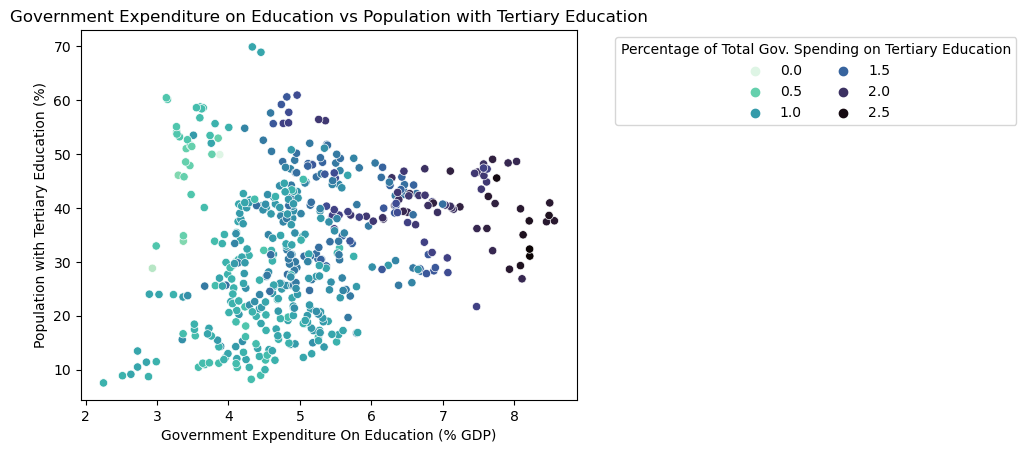

In [44]:
# Removes the instances where there are NaN values for government
# spending on tertiary education

govtert = "Government Spending Teritary (% Gov Spending)"

combined_naremoved = combined_df.loc[combined_df[govtert] != np.nan]

sns.scatterplot(data = combined_naremoved, x = "Government Expenditure On Education (%)",
                y = "Population with Tertiary Education (%)",
                hue = "Government Spending Teritary (% Gov Spending)", 
                marker = "o", palette = "mako_r");

plt.legend(bbox_to_anchor = (1.9,1), 
           loc = 'upper right', ncol = 2,
          title = "Percentage of Total Gov. Spending on Tertiary Education");

plt.title("Government Expenditure on Education vs Population with Tertiary Education");
plt.xlabel("Government Expenditure On Education (% GDP)");

This graphs shows the relationship between government expenditure on education as a percentage of GDP (the x value), government expenditure on tertiary education as a percentage of total government spending (the hue; as the percentage of government spending that goes to tertiary education increases, the color gets darker and vice verse), and the percentage of population between the age of 24 to 35 that has obtained a tertiary education. 

We initially expected there to be a strong correlation between government expenditures on education and the proportion of people with a tertiary education. We also expected there to be a strong correlation between government expenditures on tertiary education and the proportion of people with a tertiary education. Looking at the graph as a whole, there doesn't seem to be an obvious increasing or decreasing trend in proportion of people with a tertiary education as the government expenditures on education changes. Similarly, there doesn't seem to be an trend between government expenditures on tertiary education and proportion of people with tertiary degrees. 

The shape of the graph shows heteroskedasticity in that the graph exhibits a widening cone like shape.  

### Hypothesis Testing for GDP per Capita (Without Consideration of Time and Used Mean of Countries Across All Years

In [45]:
country_aver = pd.read_csv("country_average.csv")

In [46]:
input_vars = ["GDP per Capita", "Population (Million)", "Average Spending on Higher Education (USD/student)",\
              "Government Expenditure On Education (%)", "Government Spending Teritary (% Gov Spending)",\
              "Household Income per Capita", "Number of Universities", "Primary Enrollment rate (% gross)", \
              "Secondary Enrollment rate (% gross)", "Tertiary Enrollment rate (% gross)"]

In [47]:
y = country_aver["Population with Tertiary Education (%)"]

def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

x = Normalizer(country_aver[input_vars].values)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print (results.summary(),"\n")

print ("This is AIC for the full model", results.aic)
print ("This is the BIC for the full model", results.bic)

                                      OLS Regression Results                                      
Dep. Variable:     Population with Tertiary Education (%)   R-squared:                       0.601
Model:                                                OLS   Adj. R-squared:                  0.435
Method:                                     Least Squares   F-statistic:                     3.614
Date:                                    Wed, 15 Nov 2023   Prob (F-statistic):            0.00478
Time:                                            21:35:27   Log-Likelihood:                -115.38
No. Observations:                                      35   AIC:                             252.8
Df Residuals:                                          24   BIC:                             269.9
Df Model:                                              10                                         
Covariance Type:                                nonrobust                                         
          

Based on t value for GPD per capita (x1 in this model) is 0.377, which means we can not reject the hypothesis that the coefficient for GDP is equal to 0. This model shows with the data we have, we can not state there is even a relationship between the GDP per capita and the proportion of people between ages 24 to 35 with tertiary education. However, given the graphs we looked at there does seem like there is a correlation between the two things. Therefore, we wonder how the p-value will vary if we just fit the GDP per capita to the proportion of people between ages 24 to 35 with tertiary education.

Based on the p-value, the follow factors are statistically significant (has a p-value less than 0.05 given the alpha value is 0.05): Average Spending on Higher Education (USD/student)(x3) and Tertiary Enrollment rate (% gross) (x10).

In [48]:
y = country_aver["Population with Tertiary Education (%)"]

input_vars = ["GDP per Capita"]
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

x = Normalizer(country_aver[input_vars].values)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print (results.summary())

print ("This is AIC for the full model", results.aic)
print ("This is the BIC for the full model", results.bic)

                                      OLS Regression Results                                      
Dep. Variable:     Population with Tertiary Education (%)   R-squared:                       0.270
Model:                                                OLS   Adj. R-squared:                  0.248
Method:                                     Least Squares   F-statistic:                     12.24
Date:                                    Wed, 15 Nov 2023   Prob (F-statistic):            0.00136
Time:                                            21:35:27   Log-Likelihood:                -125.93
No. Observations:                                      35   AIC:                             255.9
Df Residuals:                                          33   BIC:                             259.0
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

This simplified model that just models the correlation between the GDP per capita and the percentage of population with tertiary education has a very different conclusion for the relationship between the two variables as compared to the full model. 

Since the p-value for GDP per capita (x1) is 0.001 in this model, based on this model, we can reject the null hypthesis that there is no relationship between GDP per capita and the percentage of population with tertiary education and the true coefficient is non-zero.

Although this model does result in a signficant result, the AIC and BIC values are very high and is approximately equal to the full model, which means that this model doesn't do any better in explaining the variance in y and the could be a better model. Therefore, we wrote a short function to try the combinations of the variable to find the model with the lowest AIC.

In [49]:
y = country_aver["Population with Tertiary Education (%)"]
def bestModel(inputData, ycol = y):
    aiclist=[]
    numCol = inputData.shape[1]
    min_aic = []
    colName = inputData.columns.values.tolist()
    for i in range (1,numCol):
        ## As i increases, removes the variables one by one
        var_df = inputData.iloc[:,:-i]
        norm_x = Normalizer(var_df.values)
        norm_x = sm.add_constant(norm_x)
        var_model = sm.OLS(ycol, norm_x)
        var_results = var_model.fit()
        aiclist.append(var_results.aic)
        print (var_results.aic)
        print (var_df.columns.values.tolist())
    ## We need to add one to the index because the index returns the position of
    # the most recently dropped variable and the best model based on the 
    print ("List of AIC", aiclist)
    print ("Min AIC is", np.min(aiclist))
    best_model_index = aiclist.index(np.min(aiclist)) + 1
    print ("For the pivot column",colName[0],\
           "The model that has the smallest aic uses ", \
           colName[:-best_model_index],"\n")
    print ("Best model index:", best_model_index)
    return np.min(aiclist)

In [50]:
input_vars = ["GDP per Capita", "Population (Million)", "Average Spending on Higher Education (USD/student)",\
              "Government Expenditure On Education (%)", "Government Spending Teritary (% Gov Spending)",\
              "Household Income per Capita", "Number of Universities", "Primary Enrollment rate (% gross)", \
              "Secondary Enrollment rate (% gross)", "Tertiary Enrollment rate (% gross)"]

In [51]:
min_aic_list = []
y = country_aver["Population with Tertiary Education (%)"]
for i in range (len(input_vars)):
    temp_input_vars = input_vars[i:] + input_vars[:i]
    min_aic_list.append(bestModel(country_aver[temp_input_vars], y))
print ("The list of smallest aic for all possible models is: ", min_aic_list)
print ("The smallest AIC is", np.min(min_aic_list),"\n")
indexofBestModel = min_aic_list.index(np.min(min_aic_list))
print ("The model that is best is", )

258.89827333849627
['GDP per Capita', 'Population (Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)']
263.6217017678145
['GDP per Capita', 'Population (Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)']
264.3876821149497
['GDP per Capita', 'Population (Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities']
263.8719025782498
['GDP per Capita', 'Population (Million)', 'Average Spending on Higher Educa

### DELETE WHEN SUBMIT
y = country_aver["Population with Tertiary Education (%)"]
input_vars = ["GDP per Capita", "Population (Million)", "Average Spending on Higher Education (USD/student)",\
              "Government Expenditure On Education (%)", "Government Spending Teritary (% Gov Spending)",\
              "Household Income per Capita", "Number of Universities", "Primary Enrollment rate (% gross)", \
              "Secondary Enrollment rate (% gross)", "Tertiary Enrollment rate (% gross)"]

min_aic_means_GDP = bestModel(country_aver[input_vars], y)
min_aic_all.append(min_aic_means_GDP)
print ("The minimum AIC across all models with GDP per capita using",
       "the mean values for each country between 1995 and 2019 is", min_aic_means_GDP,"\n")
       
### END HERE

In [52]:
nan_dropped_df = pd.read_csv("dropped_nan.csv")

y = nan_dropped_df["Population with Tertiary Education (%)"]
input_vars = ["GDP per Capita", "Population(Million)", "Average Spending on Higher Education (USD/student)",\
              "Government Expenditure On Education (%)", "Government Spending Teritary (% Gov Spending)",\
              "Household Income per Capita", "Number of Universities", "Primary Enrollment rate (% gross)", \
              "Secondary Enrollment rate (% gross)", "Tertiary Enrollment rate (% gross)"]
y_no_nan = nan_dropped_df["Population with Tertiary Education (%)"]
min_aic_nan_dropped = bestModel(nan_dropped_df[input_vars],y)

1441.4877212847955
['GDP per Capita', 'Population(Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)']
1472.760817522208
['GDP per Capita', 'Population(Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities', 'Primary Enrollment rate (% gross)']
1478.1376941819726
['GDP per Capita', 'Population(Million)', 'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)', 'Government Spending Teritary (% Gov Spending)', 'Household Income per Capita', 'Number of Universities']
1485.4845146158955
['GDP per Capita', 'Population(Million)', 'Average Spending on Higher Educati

## Sources:

- GDP Data: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
- Population Data: https://data.oecd.org/pop/population.htm
- Average Education Spending Data: https://data.oecd.org/eduresource/education-spending.htm#indicator-chart
- Government Expenditures on Education as a percentage of GDP Data: https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart
- Government Expenditures on Tertiary Education as a Percent of the GDP Data: https://databank.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series#
- Household Income per Capita Data: https://data.oecd.org/hha/household-disposable-income.htm#indicator-chart
- Number of Universities Data: https://www.webometrics.info/en/distribution_by_country
- Enrollment Rates Data: https://ourworldindata.org/global-education
- Population completed Tertiary Education Data: https://data.oecd.org/eduatt/population-with-tertiary-education.htm
